# Fitness Watch Data Analysis 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

## Importing the fitness watch data : 


In [3]:
data = pd.read_csv(r"Apple-Fitness-Data.csv")

In [4]:
data.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184


### Checking for null and duplicated values in our dataset : 

In [5]:
data.isnull().sum()

Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64

In [7]:
data.duplicated().sum()

0

## Step Count Over Time : 

In [29]:
import plotly.express as px
fig1 = px.line(data, x="Time",
               y="Step Count",
               title="Step Count Over Time")
fig1.show()

# Distance Covered Over Time : 

In [26]:
fig2 = px.line(data, x="Time",
               y="Distance",
               title="Distance Covered Over Time")
fig2.show()

# Energy Burned Over Time :

In [27]:
fig3 = px.line(data, x="Time",
               y="Energy Burned",
               title="Energy Burned Over Time")
fig3.show()

# Walking Speed Over Time :

In [30]:
fig4 = px.line(data, x="Time",
               y="Walking Speed",
               title="Walking Speed Over Time")
fig4.show()

# Calculate Average Step Count per Day : 

In [32]:
data.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184


In [36]:
avg_step = data.groupby('Date')["Step Count"].mean().reset_index()

In [37]:
avg_step

,Date,Step Count
0,2023-03-21,137.636364
1,2023-03-22,354.233333
2,2023-03-23,109.125000
3,2023-03-24,64.666667
4,2023-03-25,117.000000
5,2023-03-26,101.000000
6,2023-03-27,48.875000
7,2023-03-28,163.750000
8,2023-03-29,169.578947
9,2023-03-30,384.181818


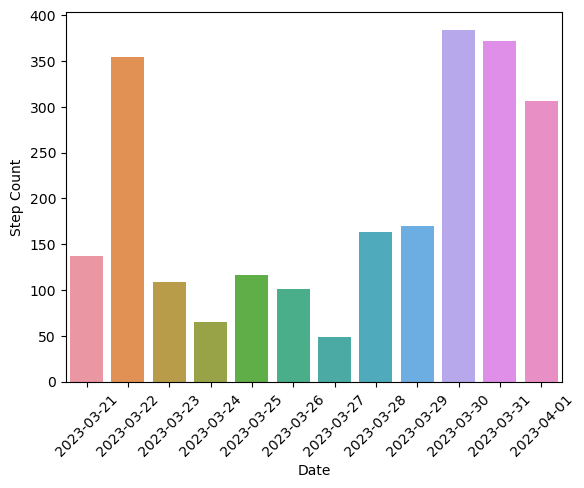

In [42]:
sns.barplot(avg_step, x = 'Date', y = "Step Count")
plt.xticks(rotation = 45)
plt.show()

# Calculate Walking Efficiency : 

In [44]:
data["Walking Eff."] = data["Distance"]/data["Step Count"]
fig5 = px.line(data,x = "Time", y = "Walking Eff.", title = "Walaking Efficiency Over Time")
fig5.show()

# Create Time Intervals : 


In [45]:
time_intervals = pd.cut(pd.to_datetime(data["Time"]).dt.hour,
                        bins=[0, 12, 18, 24],
                        labels=["Morning", "Afternoon", "Evening"], 
                        right=False)

data["Time Interval"] = time_intervals

# Variations in Step Count and Walking Speed by Time Interval
fig7 = px.scatter(data, x="Step Count",
                  y="Walking Speed",
                  color="Time Interval",
                  title="Step Count and Walking Speed Variations by Time Interval",
                  trendline='ols')
fig7.show()

C:\Users\RGM\AppData\Local\Temp\ipykernel_16288\2894008012.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

